#TRABALHO 2

REGINALDO GREGÓRIO DE SOUZA NETO

2252813

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Os valores da potabilidade na base de dados são "0" e "1". Portanto renomeei eles para melhor compreensão.

In [16]:
df = pd.read_csv('water_potability_nonans.csv')
df.replace(1, "Potável", inplace=True)
df.replace(0, "Não Potável", inplace=True)
X = df.values[:, :-1]
y = df.values[:, -1]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,Não Potável
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,Não Potável
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,Não Potável
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,Não Potável
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,Não Potável
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,Potável
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,Potável
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,Potável
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,Potável


Em seguida, plotei o histograma de cada atributo assim como pedido no enunciado da atividade.

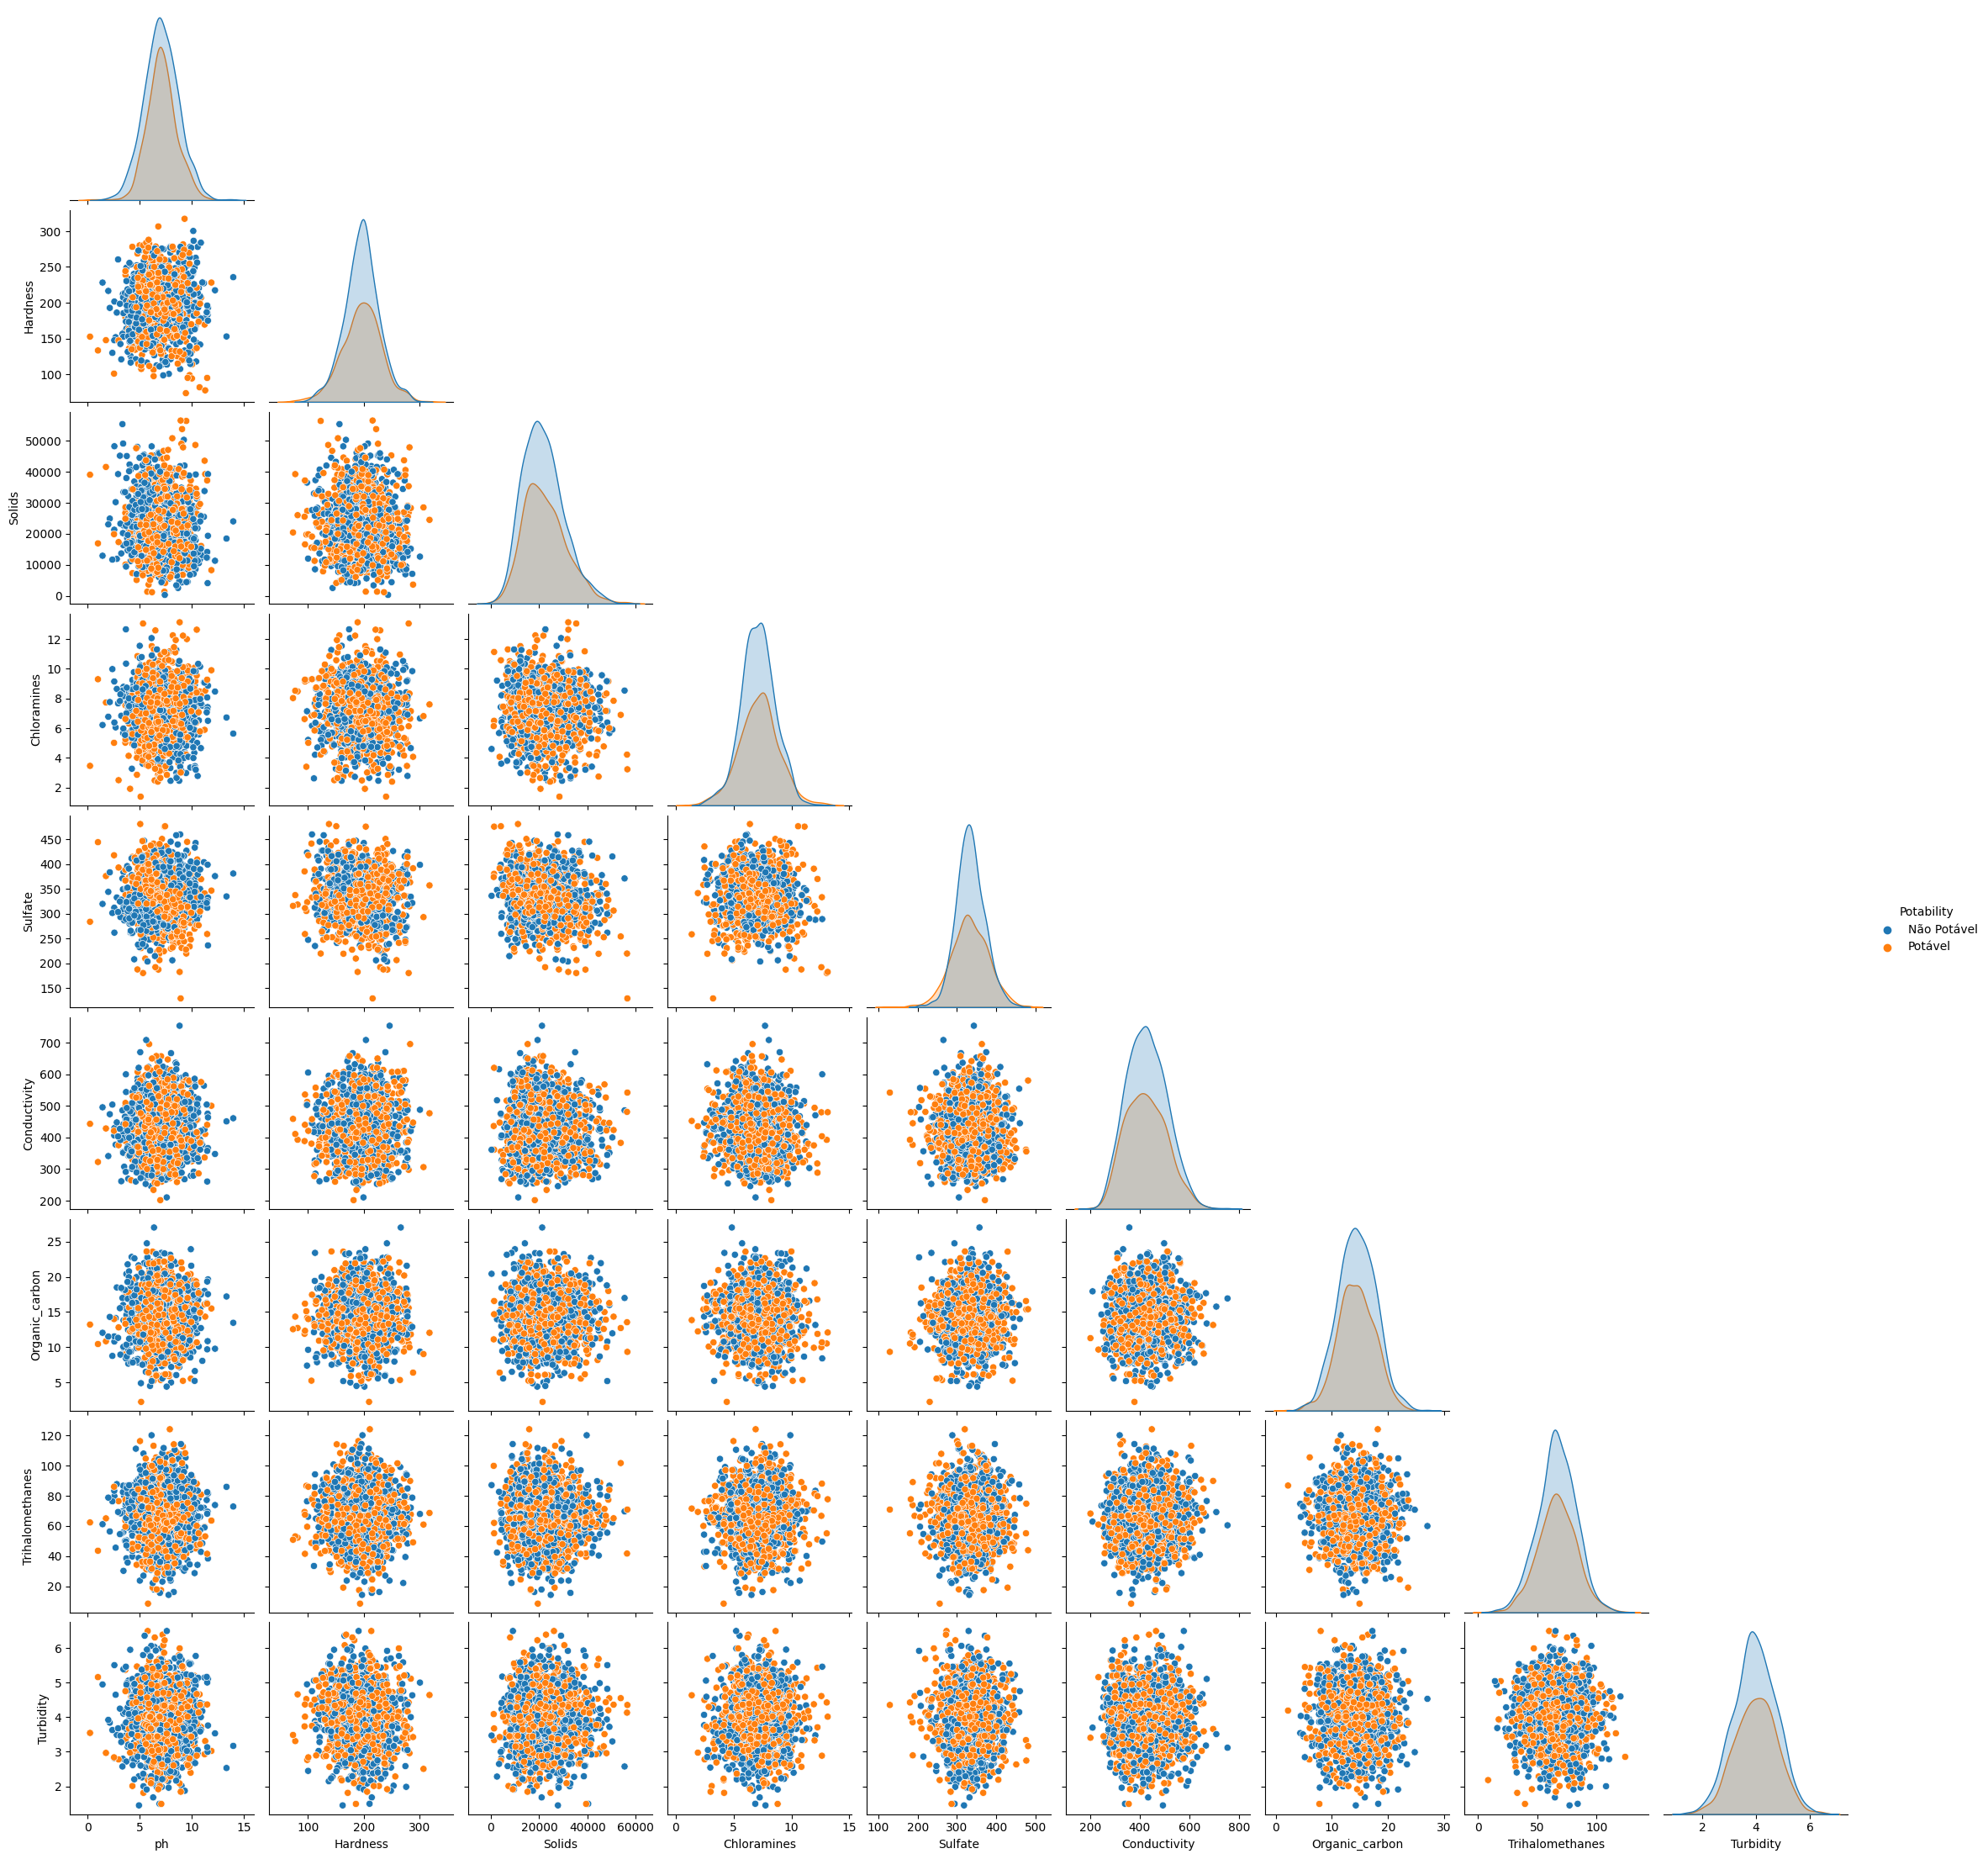

In [17]:
estatisticas_descritivas = df.describe()


sns.pairplot(df, hue='Potability', corner=True)
plt.show()


In [18]:
estatisticas_descritivas

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749


Visualmente pode se notar que os atributos PH, SULFATE são os que possuem mais "ilhas de pontos". Aparentemente serão os melhores atributos descritivos de cada classe. Mas podemos observar que HARDNESS e SOLIDS também são promissores para a classificação dos dados.

Plot pra ver quais atributos mais influenciaram no PCA

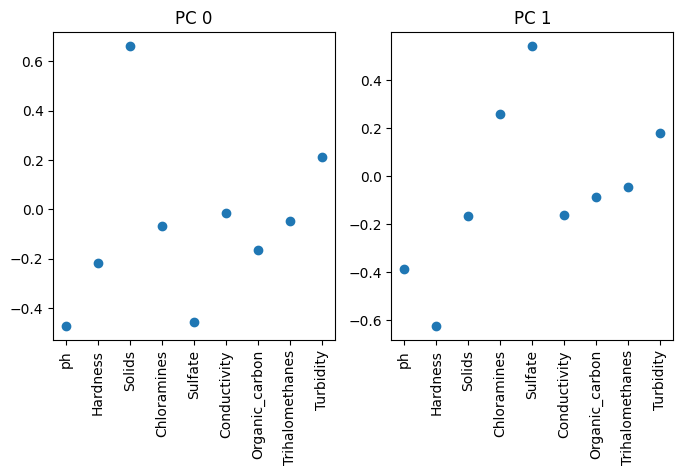

In [19]:
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=2)
for idx, pc in enumerate(pca.components_):
    ax[idx].scatter(np.arange(X.shape[1]), pc)
    ax[idx].set_xticks(np.arange(X.shape[1]))
    ax[idx].set_xticklabels(df.columns[:-1], rotation=90)
    ax[idx].set_title('PC %d' % (idx))
plt.show()


Podemos notar que nossa análise lá do início bateu com o esperado. Os atributos com mais variância foram o PH, SULFATE, HARDNESS e SOLIDS.

Fiz a padronização dos dados antes de rodar o PCA para 2 dimensões

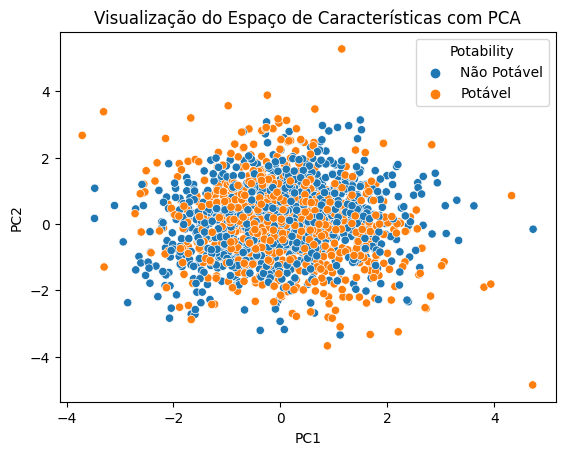

In [20]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['Potability'] = df['Potability']

sns.scatterplot(x='PC1', y='PC2', hue='Potability', data=df_pca)
plt.title('Visualização do Espaço de Características com PCA')
plt.show()

In [21]:
# Primeiro nível: StratifiedKFold com 10 vias
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Segundo nível: GridSearchCV para encontrar o melhor k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}


Assim como sugerido no enunciado da atividade, fiz o primeiro nível com StratifiedKFold com 10 vias e optei por testar 8 valores para K.

Fiz a normalização dos dados com StandardScaler no primeiro nível e usei o GridSearchCV no segundo nível pra encontrar o melhor K

In [22]:
# Primeiro nível: StratifiedKFold com 10 vias
skf_first_level = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Segundo nível: GridSearchCV para encontrar o melhor k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

first_level_scores = []
second_level_scores = []

for train_idx, val_idx in skf_first_level.split(X, y):
    X_train_first_level, X_val_first_level = X[train_idx], X[val_idx]
    y_train_first_level, y_val_first_level = y[train_idx], y[val_idx]


    scaler_first_level = StandardScaler()
    X_train_first_level_scaled = scaler_first_level.fit_transform(X_train_first_level)
    X_val_first_level_scaled = scaler_first_level.transform(X_val_first_level)

    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_first_level_scaled, y_train_first_level)

    best_k = grid_search.best_params_['n_neighbors']

    # Treinei o KNN com o melhor k encontrado
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_first_level_scaled, y_train_first_level)

    # Fazendo a predição e a acurácia do primeiro nível
    y_pred_first_level = knn.predict(X_val_first_level_scaled)
    accuracy_first_level = accuracy_score(y_val_first_level, y_pred_first_level)
    first_level_scores.append(accuracy_first_level)

    # Normalizando os dados para a validação cruzada de segundo nível
    scaler_second_level = StandardScaler()
    X_scaled_second_level = scaler_second_level.fit_transform(X_train_first_level)

    # Segundo nível: GridSearchCV para encontrar o melhor k
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled_second_level, y_train_first_level)

    # Melhor modelo com base na validação cruzada de segundo nível
    best_k_second_level = grid_search.best_params_['n_neighbors']

    # Treinei o KNN com o melhor k encontrado
    knn = KNeighborsClassifier(n_neighbors=best_k_second_level)
    knn.fit(X_scaled_second_level, y_train_first_level)

    # Prever e avaliar no conjunto de validação do segundo nível
    y_pred_second_level = knn.predict(scaler_second_level.transform(X_val_first_level))
    accuracy_second_level = accuracy_score(y_val_first_level, y_pred_second_level)
    second_level_scores.append(accuracy_second_level)

mean_accuracy_first_level = np.mean(first_level_scores)

mean_accuracy_second_level = np.mean(second_level_scores)

print(f"Acurácia média do primeiro nível: {mean_accuracy_first_level:.2f}")
print(f"Acurácia média do segundo nível: {mean_accuracy_second_level:.2f}")

Acurácia média do primeiro nível: 0.64
Acurácia média do segundo nível: 0.64
